# UFC Champions Analysis
In this notebook, we will analyze the consolidated dataset on fights data for champions of all UFC history. Though we keep it open-ended, we will attempt to shed light on pattern we may observe across weight classes, time periods, or any other significant feature.

## Table of Contents
1. Environment set-up
    * Importing Libraries
    * Loading the data
2. Initial Diagnostics
    * Glimpse
    * Descriptive Statitics
3. Data Cleaning 
    * Missing Values (Continue from here)
    * Outliers
4. Correlation Analysis 
5. Inquiry Exploraion
6. Work Cited

### 1. Environment set-up

In [1]:
## Importing Libraries

# We scraping tools
from bs4 import BeautifulSoup
import requests
import json
import lxml.html as lh

# Dataframe Manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset
df = pd.read_csv(r"C:\Users\Akoua Orsot\Desktop\ds_projects_data\ufc_champs_final.csv")

In [3]:
# Glimpse of the data
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 771 entries, 0 to 770
Columns: 121 entries, Unnamed: 0 to b_ko_odds
dtypes: bool(1), float64(58), int64(47), object(15)
memory usage: 723.7+ KB
None


,Unnamed: 0,weightclass,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,...,finish_details,finish_round,finish_round_time,total_fight_time_secs,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds
0,0,Flyweight,Demetrious Johnson,Henry Cejudo,-470.0,375,21.276596,375.0,8/4/2018,"Los Angeles, California, USA",...,NaN,5.0,5:00,1500.0,215.0,715.0,180.0,1845.0,300.0,800.0
1,1,Flyweight,Demetrious Johnson,Ray Borg,-1000.0,650,10.000000,650.0,10/7/2017,"Las Vegas, Nevada, USA",...,Armbar,5.0,3:15,1395.0,170.0,1800.0,180.0,1400.0,215.0,1700.0
2,2,Flyweight,Demetrious Johnson,Wilson Reis,-1100.0,700,9.090909,700.0,4/15/2017,"Kansas City, Missouri, USA",...,Armbar,3.0,4:49,889.0,105.0,1200.0,500.0,800.0,155.0,2000.0
3,3,Flyweight,Demetrious Johnson,Tim Elliott,-900.0,600,11.111111,600.0,12/3/2016,"Las Vegas, Nevada, USA",...,NaN,5.0,5:00,1500.0,150.0,1400.0,185.0,2000.0,259.0,1600.0
4,4,Flyweight,Demetrious Johnson,Henry Cejudo,-340.0,280,29.411765,280.0,4/23/2016,"Las Vegas, Nevada, USA",...,Knees,1.0,2:49,169.0,109.0,400.0,410.0,2400.0,445.0,1340.0


In [4]:
# Decriptive Statistics
df.describe()

,Unnamed: 0,R_odds,B_odds,R_ev,B_ev,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_SIG_STR_landed,...,B_Flyweight_rank,B_Pound-for-Pound_rank,finish_round,total_fight_time_secs,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds
count,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,693.000000,...,39.000000,68.000000,708.000000,708.000000,681.000000,691.000000,663.000000,673.000000,663.000000,673.000000
mean,202.872892,-208.211414,140.548638,80.118852,220.064720,3.989624,0.293126,1.939040,0.015564,33.747800,...,4.692308,9.161765,2.838983,777.848870,295.781204,557.509407,863.070890,1299.029718,379.630468,646.301634
std,128.014212,329.474553,279.105722,79.852095,185.733916,0.999946,0.628081,2.061438,0.152099,21.522472,...,3.570006,4.507408,1.411032,477.306112,257.716312,433.168268,602.860525,724.183275,374.754269,472.900205
min,0.000000,-1700.000000,-750.000000,5.882353,13.333333,3.000000,0.000000,0.000000,0.000000,1.760000,...,1.000000,2.000000,1.000000,12.000000,-185.000000,-195.000000,-370.000000,-1250.000000,-550.000000,-220.000000
25%,96.000000,-340.000000,-115.000000,29.411765,86.956522,3.000000,0.000000,0.000000,0.000000,18.333333,...,2.000000,4.750000,2.000000,350.500000,155.000000,260.000000,410.000000,725.000000,160.000000,325.000000
50%,192.000000,-192.000000,170.000000,52.083333,170.000000,3.000000,0.000000,1.000000,0.000000,33.000000,...,4.000000,10.500000,3.000000,900.000000,250.000000,450.000000,700.000000,1200.000000,325.000000,500.000000
75%,288.500000,100.000000,285.000000,100.000000,285.000000,5.000000,0.000000,3.000000,0.000000,48.666667,...,6.000000,14.000000,3.000000,900.000000,400.000000,724.000000,1200.000000,1800.000000,525.000000,900.000000
max,475.000000,600.000000,1200.000000,600.000000,1200.000000,5.000000,4.000000,12.000000,2.000000,117.777778,...,14.000000,15.000000,5.000000,1500.000000,1460.000000,2600.000000,2830.000000,4000.000000,2335.000000,2550.000000


### 3. Data Cleaning

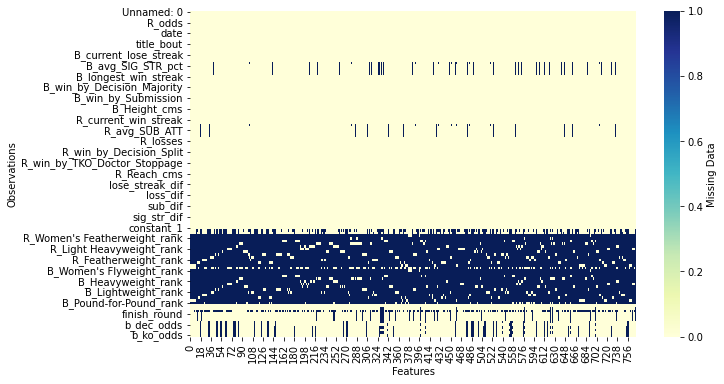

In [5]:
# Missing Values
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.xlabel("Features")
plt.ylabel("Observations")
plt.show()

In [6]:
# Print names of specific columns with null values
df.columns[df.isnull().any()]

Index(['B_avg_SIG_STR_landed', 'B_avg_SIG_STR_pct', 'B_avg_SUB_ATT',
       'B_avg_TD_landed', 'B_avg_TD_pct', 'R_avg_SIG_STR_landed',
       'R_avg_SIG_STR_pct', 'R_avg_SUB_ATT', 'R_avg_TD_landed', 'R_avg_TD_pct',
       'B_match_weightclass_rank', 'R_match_weightclass_rank',
       'R_Women's Flyweight_rank', 'R_Women's Featherweight_rank',
       'R_Women's Strawweight_rank', 'R_Women's Bantamweight_rank',
       'R_Heavyweight_rank', 'R_Light Heavyweight_rank', 'R_Middleweight_rank',
       'R_Welterweight_rank', 'R_Lightweight_rank', 'R_Featherweight_rank',
       'R_Bantamweight_rank', 'R_Flyweight_rank', 'R_Pound-for-Pound_rank',
       'B_Women's Flyweight_rank', 'B_Women's Featherweight_rank',
       'B_Women's Strawweight_rank', 'B_Women's Bantamweight_rank',
       'B_Heavyweight_rank', 'B_Light Heavyweight_rank', 'B_Middleweight_rank',
       'B_Welterweight_rank', 'B_Lightweight_rank', 'B_Featherweight_rank',
       'B_Bantamweight_rank', 'B_Flyweight_rank', 'B_Pound-for-P

### Note:
As shown in the visualization below, we have a considerable number of null values in the rank columns breaking all weight classes per first fighters in a long-format. To have a more compact dataset, we will remove the following columns since those are already condensed in **B_match_weightclass_rank, R_match_weightclass_rank**.

In [7]:
cols_rem = ["R_Women's Flyweight_rank", "R_Women's Featherweight_rank", 
            "R_Women's Strawweight_rank", "R_Women's Bantamweight_rank", 
            'R_Heavyweight_rank', 'R_Light Heavyweight_rank', 'R_Middleweight_rank', 
            'R_Welterweight_rank', 'R_Lightweight_rank', 'R_Featherweight_rank', 
            'R_Bantamweight_rank', 'R_Flyweight_rank', "B_Women's Flyweight_rank", 
            "B_Women's Featherweight_rank", "B_Women's Strawweight_rank", 
            "B_Women's Bantamweight_rank", 'B_Heavyweight_rank', 'B_Light Heavyweight_rank', 
            'B_Middleweight_rank', 'B_Welterweight_rank', 'B_Lightweight_rank', 
            'B_Featherweight_rank', 'B_Bantamweight_rank', 'B_Flyweight_rank', 
            'B_Pound-for-Pound_rank', 'R_Pound-for-Pound_rank', 'r_dec_odds',
            'b_dec_odds', 'r_sub_odds', 'b_sub_odds', 'r_ko_odds', 'b_ko_odds']

df.drop(cols_rem, inplace=True, axis=1)

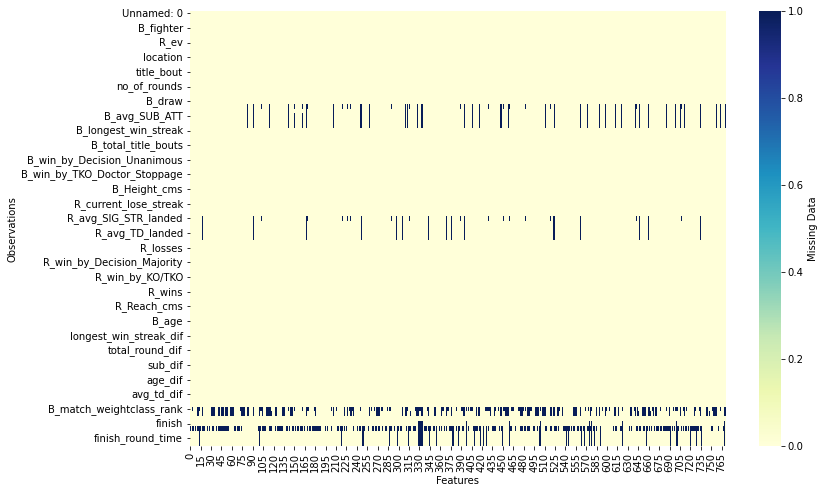

Index(['B_avg_SIG_STR_landed', 'B_avg_SIG_STR_pct', 'B_avg_SUB_ATT',
       'B_avg_TD_landed', 'B_avg_TD_pct', 'R_avg_SIG_STR_landed',
       'R_avg_SIG_STR_pct', 'R_avg_SUB_ATT', 'R_avg_TD_landed', 'R_avg_TD_pct',
       'B_match_weightclass_rank', 'R_match_weightclass_rank', 'finish',
       'finish_details', 'finish_round', 'finish_round_time',
       'total_fight_time_secs'],
      dtype='object')
finish_details              52.27
B_match_weightclass_rank    41.12
R_match_weightclass_rank    27.37
B_avg_SIG_STR_landed        10.12
finish_round_time            8.17
finish_round                 8.17
total_fight_time_secs        8.17
B_avg_TD_pct                 8.04
B_avg_TD_landed              8.04
B_avg_SUB_ATT                8.04
B_avg_SIG_STR_pct            7.78
R_avg_SIG_STR_landed         5.19
R_avg_SUB_ATT                3.11
R_avg_TD_pct                 3.11
R_avg_SIG_STR_pct            3.11
R_avg_TD_landed              3.11
finish                       2.46
dtype: float64


In [8]:
# Re-print to see the ones left


# # Missing Values
plt.figure(figsize=(12, 8))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.xlabel("Features")
plt.ylabel("Observations")
plt.show()
print(df.columns[df.isnull().any()])
cols_null =list(df.columns[df.isnull().any()])
print(df[cols_null].isnull().mean().round(4).mul(100).sort_values(ascending=False))

#### Note:
As with any data processing, we would expect some values to fall through the cracks. As a result, we will attempt to scrpa the UFC stats website to recover as much null values as possible.

In [9]:
# num_cols = [
#    'B_avg_SIG_STR_landed', 'B_avg_SIG_STR_pct', 'B_avg_SUB_ATT',
#    'B_avg_TD_landed', 'B_avg_TD_pct', 'R_avg_SIG_STR_landed',
#    'R_avg_SIG_STR_pct', 'R_avg_SUB_ATT', 'R_avg_TD_landed', 
#    'R_avg_TD_pct',
#     ]

table_url = 'https://www.fightmatrix.com/fighter-search/?fName=Tim+Elliott'
response = requests.get(table_url)
soup = BeautifulSoup(response.text, 'html.parser')
#soup.body

# html_df = pd.read_html(table_url, header=0)[1]
# html_df

In [11]:
# Search through table, find url and get the table for fights
# Extract the information to replace in null values
table_url = 'https://www.fightmatrix.com/fighter-profile/Tim+Elliott/49560/'
html_df = pd.read_html(table_url)[0]


# Work citing this code
response = requests.get(table_url)
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find('table')

links = list()
for tr in table.findAll("tr"):
    trs = tr.findAll("td")
    for each in trs:
        try:
            link = each.find('a')['href']
            if link not in links:
                links.append(link)
        except:
            pass
# drop first row with all null values
html_df = html_df.iloc[1: , :]

#Include all links into table
html_df['Link'] = links
#html_df['Full Name'] = html_df[['First','Last']].apply(lambda x: ' '.join(x), axis=1)
#html_df

# for fighter_url in links:
#     df = pd.read_html(fighter_url) ###<-- List

#     df[0] ###<-- Pandas DataFrame
# html_df.head(3)

In [ ]:
#letters_fighters
#df['R_fighter'].apply(lambda x: x[0], axis=1)